In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 10)

In [4]:
train = pd.read_csv('data/credit_train_clean_loc.csv.zip', index_col='client_id', compression='gzip')
train.head()

,age,credit_month,credit_sum,education,gender,job_position,marital_status,monthly_income,open_account_flg,score_shk,tariff_id,lat,lon,overdue_credit_count,credit_count
client_id,,,,,,,,,,,,,,,
1,48,10,59998.00,GRD,M,UMN,MAR,30000.0,0.0,0.770249,"1,6",45.272365,38.951409,1.0,1.0
2,28,6,10889.00,GRD,F,UMN,MAR,43000.0,0.0,0.248514,"1,1",55.755814,37.617635,0.0,2.0
3,32,12,10728.00,SCH,M,SPC,MAR,23000.0,0.0,0.459589,"1,1",51.578529,46.797223,0.0,5.0
4,27,12,12009.09,GRD,F,SPC,DIV,17000.0,0.0,0.362536,"1,1",49.615821,44.151406,0.0,2.0
5,45,10,16908.89,SCH,M,SPC,MAR,25000.0,0.0,0.421385,"1,1",54.446199,60.395641,0.0,1.0


In [5]:
train.describe()

,age,credit_month,credit_sum,monthly_income,open_account_flg,score_shk,lat,lon,overdue_credit_count,credit_count
count,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000
mean,36.497283,10.980749,26095.047799,40138.258261,0.176028,0.469473,55.361796,54.856124,0.045992,2.071400
std,10.546008,3.536698,16234.794320,25044.135085,0.380845,0.124268,5.305942,25.442360,0.206140,1.739792
min,18.000000,3.000000,2736.000000,5000.000000,0.000000,0.000000,42.869937,21.229930,0.000000,0.000000
25%,28.000000,10.000000,14908.000000,25000.000000,0.000000,0.379495,53.276350,37.617635,0.000000,1.000000
50%,34.000000,10.000000,21229.000000,35000.000000,0.000000,0.461599,55.755814,44.634151,0.000000,2.000000
75%,43.000000,12.000000,32068.000000,50000.000000,0.000000,0.552419,58.586755,61.530761,0.000000,3.000000
max,71.000000,36.000000,200000.000000,950000.000000,1.000000,1.128291,67.714212,174.432311,3.000000,21.000000


In [6]:
# данные, которые заполнены не полностью.
[(i,170746 - v) for i, v in train.count().iteritems() if v < 170746]

[]

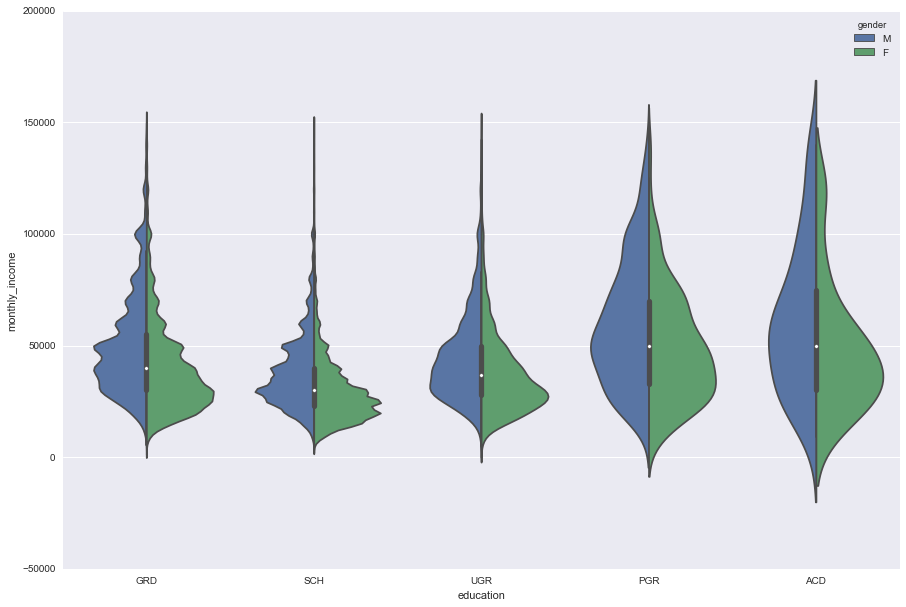

In [6]:
# просто любопытно распределение ЗП по уровням образования и полу. 
# Выборка тех у кого ЗП меньше 150000, так как дальше идут единичные выбросы которые портят масштаб
sns.violinplot(x='education', y='monthly_income', hue='gender', data=train[train['monthly_income'] < 150000], split=True)

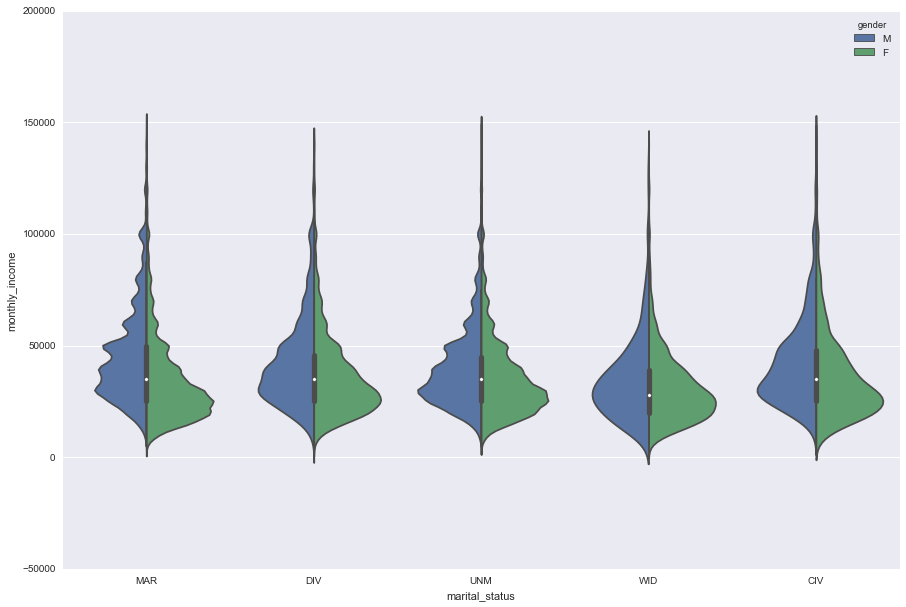

In [7]:
# Для интереса посмотрим как зависит доход от семейного положения. Надеемся, что никак. :)
sns.violinplot(x='marital_status', y='monthly_income', hue='gender', data=train[train['monthly_income'] < 150000], split=True)

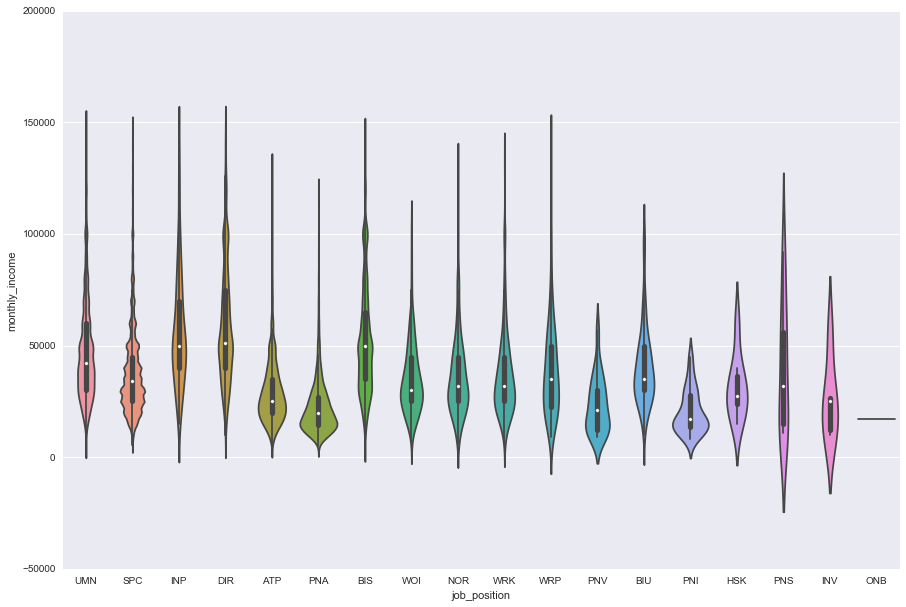

In [8]:
sns.violinplot(x='job_position', y='monthly_income', data=train[train['monthly_income'] < 150000])

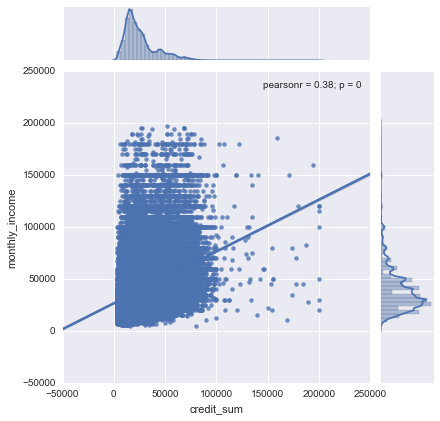

In [9]:
# Обычно кредиты берут до 100_000 обычные люди с ЗП до 100_000.
# Большие кредиты берут редко, причем независимо от уровня дохода.
sns.jointplot('credit_sum', 'monthly_income', data=train[train['monthly_income'] < 200000], kind="reg")

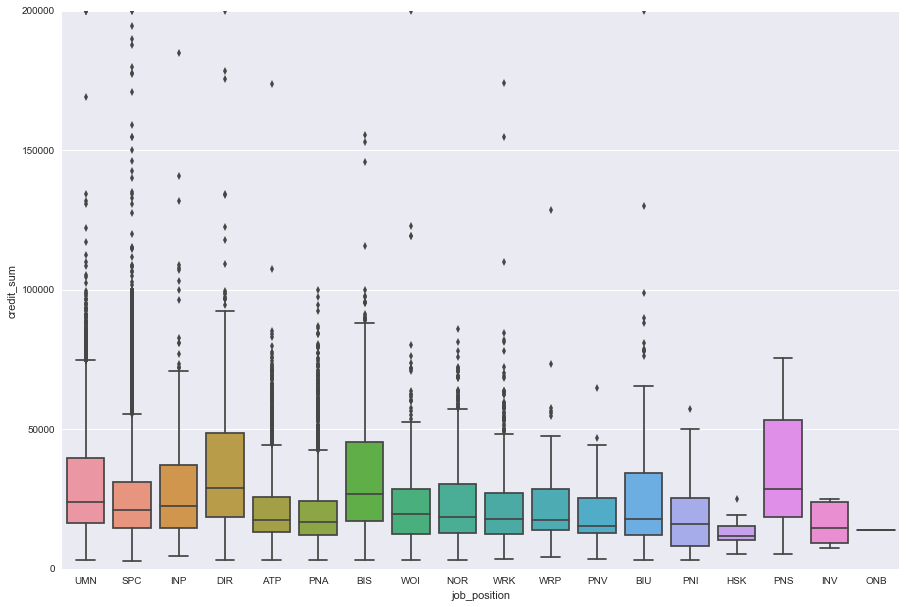

In [10]:
# Посмотрим кто у нас чаще берет кредиты и в каких размерах.
# Вы только посмотрите как часто HSK(домохозяйки) берут мелкие кредиты!!
# Видно, что специалисты, директора, ИП, руководители и бизнесмены берут большие кредиты. Вероятно для больших покупок!
sns.boxplot(x='job_position', y='credit_sum', data=train)

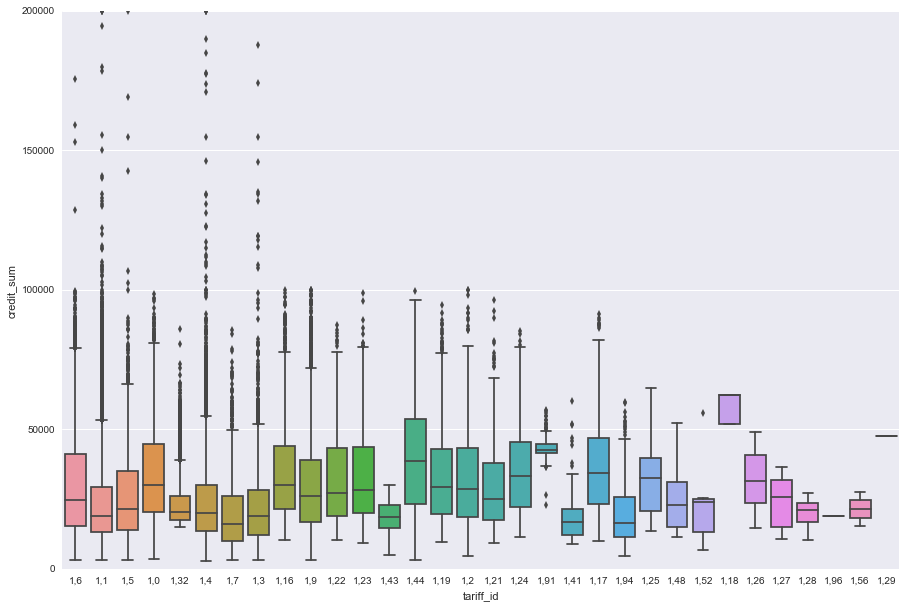

In [11]:
sns.boxplot(x='tariff_id', y='credit_sum', data=train)

In [7]:
test = pd.read_csv('data/credit_test_clean_loc.csv.zip', index_col='client_id', compression='gzip').drop(['open_account_flg'], axis = 1)
test.head()

,age,credit_month,credit_sum,education,gender,job_position,marital_status,monthly_income,score_shk,tariff_id,lat,lon,overdue_credit_count,credit_count
client_id,,,,,,,,,,,,,,
170747,48,10,16558.00,GRD,F,UMN,MAR,34000.0,0.370409,"1,1",53.386357,89.897078,0.0,2.0
170748,29,6,7028.72,SCH,M,SPC,MAR,19000.0,0.377281,"1,4",54.779047,87.207361,0.0,3.0
170749,20,10,13019.00,SCH,F,SPC,UNM,25000.0,0.538515,"1,6",50.872231,37.303198,0.0,1.0
170750,41,10,9379.00,GRD,F,SPC,MAR,30000.0,0.482520,"1,1",57.100294,106.363305,0.0,0.0
170751,31,6,13990.00,GRD,F,SPC,MAR,20000.0,0.485914,"1,43",58.679946,49.830366,0.0,2.0


In [8]:
test.describe()

,age,credit_month,credit_sum,monthly_income,score_shk,lat,lon,overdue_credit_count,credit_count
count,91940.000000,91940.000000,91940.000000,91940.000000,91940.000000,91940.000000,91940.000000,91940.000000,91940.000000
mean,36.461127,10.981336,26068.147740,40083.121503,0.469269,55.330433,54.812100,0.045773,2.073614
std,10.512266,3.551548,16228.036303,24652.577792,0.124616,5.306794,25.349594,0.205962,1.735330
min,18.000000,3.000000,3000.000000,0.000000,0.000000,42.869937,21.229930,0.000000,0.000000
25%,28.000000,10.000000,14865.252500,25000.000000,0.379118,53.276350,37.617635,0.000000,1.000000
50%,34.000000,10.000000,21141.000000,35000.000000,0.461158,55.755814,44.634151,0.000000,2.000000
75%,43.000000,12.000000,31990.000000,50000.000000,0.552029,58.586755,61.530761,0.000000,3.000000
max,71.000000,36.000000,200000.000000,700000.000000,1.255892,67.714212,174.432311,3.000000,22.000000


In [9]:
[(i,91940 - v) for i, v in test.count().iteritems() if v < 91940]

[]

In [10]:
all_data = pd.get_dummies(pd.concat([test, train]),columns=['gender', 'marital_status', 'job_position', 'tariff_id', 'education'])
print(all_data.shape)

(262686, 72)


In [11]:
train_dummy = all_data.ix[train.index]
print(train_dummy.shape)
print([(i,train_dummy.shape[0] - v) for i, v in train_dummy.count().iteritems() if v < train_dummy.shape[0]])
train_dummy.head()

(170746, 72)
[]


,age,credit_count,credit_month,credit_sum,lat,lon,monthly_income,open_account_flg,overdue_credit_count,score_shk,...,"tariff_id_1,7","tariff_id_1,9","tariff_id_1,91","tariff_id_1,94","tariff_id_1,96",education_ACD,education_GRD,education_PGR,education_SCH,education_UGR
client_id,,,,,,,,,,,,,,,,,,,,,
1,48,1.0,10,59998.00,45.272365,38.951409,30000.0,0.0,1.0,0.770249,...,0,0,0,0,0,0,1,0,0,0
2,28,2.0,6,10889.00,55.755814,37.617635,43000.0,0.0,0.0,0.248514,...,0,0,0,0,0,0,1,0,0,0
3,32,5.0,12,10728.00,51.578529,46.797223,23000.0,0.0,0.0,0.459589,...,0,0,0,0,0,0,0,0,1,0
4,27,2.0,12,12009.09,49.615821,44.151406,17000.0,0.0,0.0,0.362536,...,0,0,0,0,0,0,1,0,0,0
5,45,1.0,10,16908.89,54.446199,60.395641,25000.0,0.0,0.0,0.421385,...,0,0,0,0,0,0,0,0,1,0


In [12]:
test_dummy = all_data.ix[test.index].drop(['open_account_flg'], axis = 1)
print(test_dummy.shape)
print([(i,test_dummy.shape[0] - v) for i, v in test_dummy.count().iteritems() if v < test_dummy.shape[0]])
test_dummy.head()

(91940, 71)
[]


,age,credit_count,credit_month,credit_sum,lat,lon,monthly_income,overdue_credit_count,score_shk,gender_F,...,"tariff_id_1,7","tariff_id_1,9","tariff_id_1,91","tariff_id_1,94","tariff_id_1,96",education_ACD,education_GRD,education_PGR,education_SCH,education_UGR
client_id,,,,,,,,,,,,,,,,,,,,,
170747,48,2.0,10,16558.00,53.386357,89.897078,34000.0,0.0,0.370409,1,...,0,0,0,0,0,0,1,0,0,0
170748,29,3.0,6,7028.72,54.779047,87.207361,19000.0,0.0,0.377281,0,...,0,0,0,0,0,0,0,0,1,0
170749,20,1.0,10,13019.00,50.872231,37.303198,25000.0,0.0,0.538515,1,...,0,0,0,0,0,0,0,0,1,0
170750,41,0.0,10,9379.00,57.100294,106.363305,30000.0,0.0,0.482520,1,...,0,0,0,0,0,0,1,0,0,0
170751,31,2.0,6,13990.00,58.679946,49.830366,20000.0,0.0,0.485914,1,...,0,0,0,0,0,0,1,0,0,0


In [13]:
x_train = train_dummy.drop(['open_account_flg'], axis=1)
y_train = train_dummy['open_account_flg']

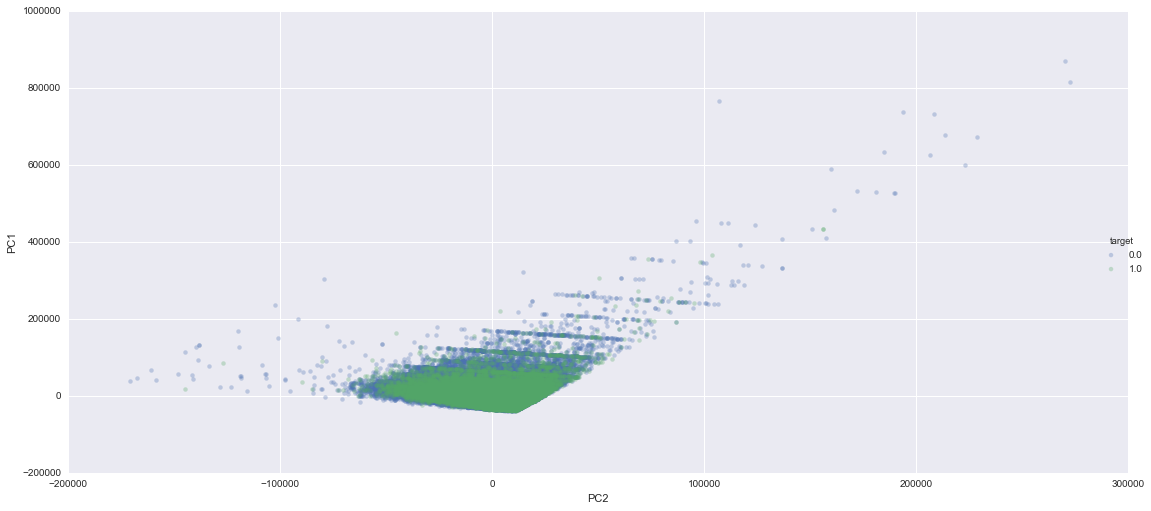

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sScaler = StandardScaler(copy=True, with_mean=True, with_std=True)
xScaled = sScaler.fit_transform(x_train)
forPca = pd.DataFrame(xScaled)

pcaMod = PCA(n_components=2)
xPca = pcaMod.fit_transform(x_train)
xPcaDataframe = pd.DataFrame(xPca, columns=['PC1', 'PC2'],index=x_train.index)
xPcaDataframe['target'] = y_train

ax = sns.lmplot(data = xPcaDataframe, x='PC2', y='PC1', hue='target', size=10, aspect=20, fit_reg=False,
               scatter_kws={'alpha': 0.3})
fig = plt.gcf()
fig.set_size_inches(15, 7)

In [15]:
xPcaDataframe.head()

,PC1,PC2,target
client_id,,,
1,1503.536280,-35354.402860,0.0
2,-2267.170370,15305.991250,0.0
3,-21220.634587,8919.120277,0.0
4,-26472.028209,5746.730091,0.0
5,-17309.703371,3731.827965,0.0


In [16]:
def save(fname, pred, test):
    res1 = pd.DataFrame()
    res1['_ID_'] = test.index
    res1['_VAL_'] = pred
    res1.to_csv("submissions/{0}.csv".format(fname), index=False)
    return res1

# Случайный лес

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [18]:
def findParamsRFC(X, Y):
    clf = RandomForestClassifier(random_state=42)
    parameter_grid = {'n_estimators' : [20, 100],
                     'max_depth' : [20, 100],
                     'min_samples_split' : [2, 5],
                     'max_leaf_nodes' : [40, 60]
                     }
    grid_search = GridSearchCV(clf, param_grid=parameter_grid, scoring='roc_auc', cv=StratifiedKFold(5))
    grid_search.fit(X, Y)
    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    return grid_search

In [19]:
%%time
rfc_params = findParamsRFC(x_train, y_train)

Best score: 0.74380271411812
Best parameters: {'max_depth': 20, 'max_leaf_nodes': 60, 'n_estimators': 100, 'min_samples_split': 2}
CPU times: user 12min 33s, sys: 29.5 s, total: 13min 2s
Wall time: 13min 19s


In [20]:
def trainRFC(X, Y, X_test, params):
    clf = RandomForestClassifier(n_estimators=100, min_samples_split=5, max_leaf_nodes=60, max_depth=20)
    clf.fit(X, Y)
    return clf.predict_proba(X_test)

In [21]:
%%time
pred = trainRFC(x_train, y_train, test_dummy, rfc_params.best_params_)

CPU times: user 22.2 s, sys: 558 ms, total: 22.7 s
Wall time: 23.5 s


In [22]:
test.shape

(91940, 14)

In [23]:
res = save("rfc_2_loc", pred[:, 1], pd.read_csv('data/credit_test.csv.zip', encoding='cp1251', delimiter=';', index_col='client_id'))
res.describe()

,_ID_,_VAL_
count,91940.000000,91940.000000
mean,216716.500000,0.176204
std,26540.936212,0.073946
min,170747.000000,0.071837
25%,193731.750000,0.118869
50%,216716.500000,0.153506
75%,239701.250000,0.217574
max,262686.000000,0.525069


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

def testCLF(clf, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    return roc_auc_score(y_test, pred)

In [68]:
clf = RandomForestClassifier(n_estimators=100, min_samples_split=5, max_leaf_nodes=60, max_depth=20)
print(testCLF(clf, x_train, y_train))

0.501235706683


In [70]:
clf = RandomForestClassifier(n_estimators=100, min_samples_split=5, max_leaf_nodes=60, max_depth=20)
print(testCLF(clf, xPcaDataframe.drop(['target'], axis = 1), xPcaDataframe['target']))

0.5


# Логистическая регрессия

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [25]:
def findParamsLRC(X, Y):
    XX = StandardScaler().fit_transform(X)
    clf = LogisticRegression(random_state=42)
    grid = {'C': np.linspace(0.001,1,10)}
    grid_search = GridSearchCV(clf, grid, scoring='roc_auc', cv=StratifiedKFold(5))
    grid_search.fit(XX, Y)
    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    return grid_search

In [26]:
%%time
findParamsLRC(x_train, y_train)

Best score: 0.7075307087296562
Best parameters: {'C': 0.001}
CPU times: user 2min 16s, sys: 12.7 s, total: 2min 29s
Wall time: 2min 35s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([ 0.001,  0.112,  0.223,  0.334,  0.445,  0.556,  0.667,  0.778,
        0.889,  1.   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [30]:
train.columns

Index(['age', 'credit_month', 'credit_sum', 'education', 'gender',
       'job_position', 'marital_status', 'monthly_income', 'open_account_flg',
       'score_shk', 'tariff_id', 'lat', 'lon', 'overdue_credit_count',
       'credit_count'],
      dtype='object')

In [38]:
group = train.groupby(['education', 'job_position'], as_index=False).mean()
group.head()

,education,job_position,age,credit_month,credit_sum,monthly_income,open_account_flg,score_shk,lat,lon,overdue_credit_count,credit_count
0,ACD,ATP,21.500000,9.000000,19177.885000,20000.000000,0.500000,0.636896,55.719142,54.661254,0.018076,0.789677
1,ACD,BIS,47.333333,13.333333,50420.666667,103333.333333,0.000000,0.226889,49.585637,39.279057,0.000000,1.000000
2,ACD,DIR,39.083333,9.833333,33256.333333,96250.000000,0.166667,0.411867,54.374503,42.990625,0.000000,2.250000
3,ACD,INP,26.666667,8.000000,17079.666667,63333.333333,1.000000,0.550317,56.916427,43.661914,0.057340,2.245622
4,ACD,NOR,41.000000,12.000000,24990.000000,120000.000000,0.000000,0.648568,55.276272,79.770236,0.000000,0.000000


In [42]:
education_job_income = group.pivot('education', 'job_position', 'monthly_income').fillna(0)
education_job_income

job_position,ATP,BIS,BIU,DIR,HSK,INP,INV,NOR,ONB,PNA,PNI,PNS,PNV,SPC,UMN,WOI,WRK,WRP
education,,,,,,,,,,,,,,,,,,
ACD,20000.000000,103333.333333,0.000000,96250.000000,0.000000,63333.333333,0.0,120000.000000,0.0,11950.000000,0.000000,0.000000,0.000000,54873.076923,84776.000000,31000.000000,30000.000000,35000.000000
GRD,35289.197425,66094.569179,47068.888889,70216.344156,0.000000,73422.222222,0.0,43523.351955,0.0,27142.389189,21335.294118,54300.000000,24933.333333,43121.132533,53674.575265,44305.952381,44456.557377,47229.062500
PGR,33000.000000,78103.448276,0.000000,81102.631579,0.000000,141250.000000,0.0,34285.714286,0.0,26642.857143,0.000000,0.000000,20000.000000,53473.333333,69269.857143,25000.000000,30000.000000,88000.000000
SCH,28215.652072,51955.416477,35879.310345,55400.558659,33333.333333,58933.333333,25680.0,32957.317073,17000.0,21190.350000,19704.878049,35780.000000,22475.500000,33984.244901,40544.574717,33286.242938,35354.587444,32632.500000
UGR,32789.430052,66979.767442,44826.086957,67986.165803,25000.000000,57048.148148,0.0,32891.174603,0.0,24280.905660,21900.000000,26333.333333,0.000000,40653.891215,49219.315907,33703.295455,35467.857143,39493.956522


In [53]:
education_job_income = education_job_income.reindex_axis(education_job_income.mean().sort_values().index, axis = 1)
education_job_income.head()

job_position,ONB,INV,HSK,PNI,PNV,PNA,PNS,BIU,ATP,WOI,WRK,SPC,WRP,NOR,UMN,BIS,DIR,INP
education,,,,,,,,,,,,,,,,,,
ACD,0.0,0.0,0.000000,0.000000,0.000000,11950.000000,0.000000,0.000000,20000.000000,31000.000000,30000.000000,54873.076923,35000.000000,120000.000000,84776.000000,103333.333333,96250.000000,63333.333333
GRD,0.0,0.0,0.000000,21335.294118,24933.333333,27142.389189,54300.000000,47068.888889,35289.197425,44305.952381,44456.557377,43121.132533,47229.062500,43523.351955,53674.575265,66094.569179,70216.344156,73422.222222
PGR,0.0,0.0,0.000000,0.000000,20000.000000,26642.857143,0.000000,0.000000,33000.000000,25000.000000,30000.000000,53473.333333,88000.000000,34285.714286,69269.857143,78103.448276,81102.631579,141250.000000
SCH,17000.0,25680.0,33333.333333,19704.878049,22475.500000,21190.350000,35780.000000,35879.310345,28215.652072,33286.242938,35354.587444,33984.244901,32632.500000,32957.317073,40544.574717,51955.416477,55400.558659,58933.333333
UGR,0.0,0.0,25000.000000,21900.000000,0.000000,24280.905660,26333.333333,44826.086957,32789.430052,33703.295455,35467.857143,40653.891215,39493.956522,32891.174603,49219.315907,66979.767442,67986.165803,57048.148148


In [63]:
education_job_income = education_job_income.reindex_axis(education_job_income.mean(axis=1).sort_values(ascending=False).index, axis = 0)
education_job_income.head()

job_position,ONB,INV,HSK,PNI,PNV,PNA,PNS,BIU,ATP,WOI,WRK,SPC,WRP,NOR,UMN,BIS,DIR,INP
education,,,,,,,,,,,,,,,,,,
GRD,0.0,0.0,0.000000,21335.294118,24933.333333,27142.389189,54300.000000,47068.888889,35289.197425,44305.952381,44456.557377,43121.132533,47229.062500,43523.351955,53674.575265,66094.569179,70216.344156,73422.222222
PGR,0.0,0.0,0.000000,0.000000,20000.000000,26642.857143,0.000000,0.000000,33000.000000,25000.000000,30000.000000,53473.333333,88000.000000,34285.714286,69269.857143,78103.448276,81102.631579,141250.000000
ACD,0.0,0.0,0.000000,0.000000,0.000000,11950.000000,0.000000,0.000000,20000.000000,31000.000000,30000.000000,54873.076923,35000.000000,120000.000000,84776.000000,103333.333333,96250.000000,63333.333333
SCH,17000.0,25680.0,33333.333333,19704.878049,22475.500000,21190.350000,35780.000000,35879.310345,28215.652072,33286.242938,35354.587444,33984.244901,32632.500000,32957.317073,40544.574717,51955.416477,55400.558659,58933.333333
UGR,0.0,0.0,25000.000000,21900.000000,0.000000,24280.905660,26333.333333,44826.086957,32789.430052,33703.295455,35467.857143,40653.891215,39493.956522,32891.174603,49219.315907,66979.767442,67986.165803,57048.148148


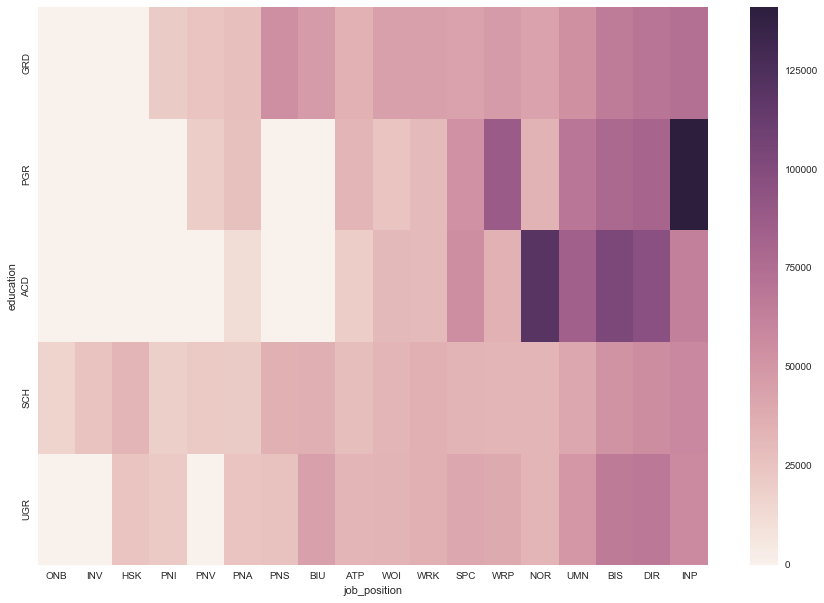

In [64]:
sns.heatmap(education_job_income)